In [2]:
import sopa
import spatialdata

Tissue = "Region2"
#sdata = spatialdata.read_zarr(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/{Tissue}_Xenium_Phen_HE_Integrated.V4.ongoing.zarr")
#sdata

/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/ugursahin/miniforge3/envs/ScanP

In [3]:
import spatialdata as sd
#from spatialdata_io import xenium

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
#!pip install squidpy
import squidpy as sq
import sopa


# Pheno = "Proteins_PhenoCycler_byXStock"
# adata_pheno = sdata.tables[Pheno].copy()

# Xenium = "GeneTranscripts_XStockP"
# adata_xenium_p = sdata.tables[Xenium].copy()

# adata_pheno.write_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/REGION2_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.Protein_PhenCycTable.h5ad")
# adata_xenium_p.write_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/REGION2_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.Xenium_Process_Table.h5ad")



/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [9]:
#adata_pheno = sc.read_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region4/REGION4_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.Protein_PhenCycTable.V1.h5ad")
#adata_xenium_p = sc.read_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region4/REGION4_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.GeneTranscripts_XStock_Process.V1.h5ad")


adata_xenium_p = sc.read_h5ad("/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region2/REGION2_TABLES/Region_2_Xenium_Phen_HE_Integrated.Xenium_Process_Table.h5ad")
adata_pheno = sc.read_h5ad("/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region2/REGION2_TABLES/Region_2_Xenium_Phen_HE_Integrated.Protein_PhenCycTable.V2.h5ad")

In [10]:
adata_xenium_p

AnnData object with n_obs × n_vars = 299769 × 5101
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

## QC

In [11]:
sc.pp.calculate_qc_metrics(adata_xenium_p, percent_top=(10, 20, 50, 150), inplace=True)

cprobes = (
    adata_xenium_p.obs["control_probe_counts"].sum() / adata_xenium_p.obs["total_counts"].sum() * 100
)
cwords = (
    adata_xenium_p.obs["control_codeword_counts"].sum() / adata_xenium_p.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0014586592776719256
Negative decoding count % : 0.00023425488399698145


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

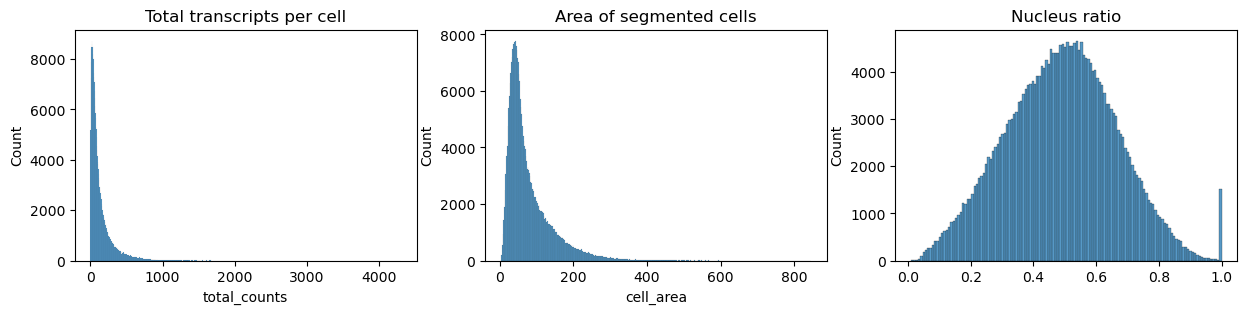

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata_xenium_p.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

#axs[1].set_title("Unique transcripts per cell")
#sns.histplot(
#    adata_xenium_p.obs["n_genes_by_counts"],
#    kde=False,
#    ax=axs[1],
#)


axs[1].set_title("Area of segmented cells")
sns.histplot(
    adata_xenium_p.obs["cell_area"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Nucleus ratio")
sns.histplot(
    adata_xenium_p.obs["nucleus_area"] / adata_xenium_p.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

## PhenoCycler Biomarkers Enrichment will be paired w/ Proteins_PhenoCycler_byXStock

In [13]:

marker_cell_dict_cells_2 = {
'1': 'CD8', 
'2': 'CD31', 
'3': 'CD11c', 
'4': 'CD34', 
'5': 'CD20', 
'6': 'CD4', 
'7': 'CD21', 
'8': 'Ki67', 
'9': 'CD68', 
'10': 'E-cadherin', #Luminal Epithelial and Adenocarcinoma Cells
'11': 'pten', 
'12': 'NF-H', # Glandular 
'13': 'FOXp3', 
'14': 'CD45', 
'15': 'TFAM', 
'16': 'PDL-1', 
'17': 'SOX2', 
'18': 'Vimentin', 
'19': 'HIF1A', 
'20': 'CD44', 
'21': 'Keratin 8/18', #'Luminal epithelial cell (CK8/18⁺)',
'22': 'aSMA', #'Smooth muscle cell / myofibroblast', 
'24': 'K14'#'Basal epithelial cell (K14⁺)'
}

#Find the enriched cells by specific marker genes from PhenoCycler data
sopa.utils.higher_z_score(adata_pheno, marker_cell_dict_cells_2)

[INFO] (sopa.utils.annotation) Annotation counts: cell_type
aSMA            27624
CD8             20821
Keratin 8/18    20567
CD34            18054
FOXp3           17149
CD68            16898
E-cadherin      16854
K14             16280
CD20            15842
TFAM            15801
Ki67            14486
pten            14296
CD21            13681
CD4             13227
CD31             8622
CD44             8169
PDL-1            7429
SOX2             6899
Vimentin         6523
CD11c            5437
HIF1A            5405
NF-H             4932
CD45             4773
Name: count, dtype: int64


## This is for the pairing cell_id with cell_type

In [14]:

adata_xenium_p.obs["cell_type"] = (
    adata_pheno
         .obs["cell_type"]
         .values
)

# now that obs has two columns: cell_id & cell_type
adata_xenium_p.obs["cell_type"]

0          Ki67
1         FOXp3
2          pten
3           CD8
4          pten
          ...  
299764     CD34
299765     CD45
299766    PDL-1
299767     aSMA
299768    CD11c
Name: cell_type, Length: 299769, dtype: object

#### PRE - FILTER OF DATA HIGHLY VARIABLE GENES


In [15]:
#!export OMP_MAX_ACTIVE_LEVELS=1   # replaces deprecated omp_set_nested
#!export OMP_NESTED=FALSE          # disable nested parallel regions
#!export KMP_DUPLICATE_LIB_OK=TRUE # allow multiple OpenMP runtimes


# 1. Normalize to counts per 10 000 spots per cell (CP10K)
sc.pp.normalize_total(adata_xenium_p, target_sum=1e4)

# 2. Log‐transform
sc.pp.log1p(adata_xenium_p)

# 3. Find highly variable genes (HVGs)
sc.pp.highly_variable_genes(
    adata_xenium_p,
    n_top_genes=2000,
    flavor="seurat"
)
adata_xenium_p = adata_xenium_p[:, adata_xenium_p.var.highly_variable] ### NOT: DANININ KUYRUGU BURADA KOPUYOR
sc.pp.scale(adata_xenium_p, max_value=10) # Doesn't allow to dominate outlier genes

/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


#### MAIN ANALYSIS DOWNSTREAM OF PREPROCESSING ####


/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:536: UserWarning: Ignoring svd_solver='argpack' and using arpack, sklearn.decomposition._pca.PCA only supports dict_keys(['auto', 'full', 'randomized', 'arpack', 'covariance_eigh']).
  warnings.warn(msg)


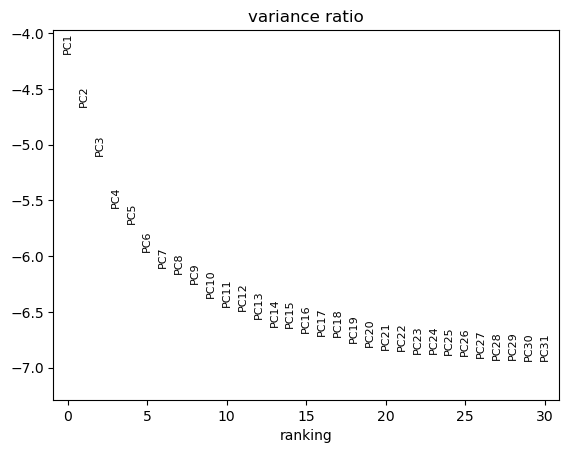

In [16]:
# 1. Dimensionality reduction & clustering
sc.tl.pca(adata_xenium_p, svd_solver = "argpack")
sc.pl.pca_variance_ratio(adata_xenium_p, log=True)

/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/4p/7h_929nx5qngrf9z7xhfy15w0000gn/T/ipykernel_1557/2596353347.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_xenium_p, resolution=1.0, key_added="leiden")


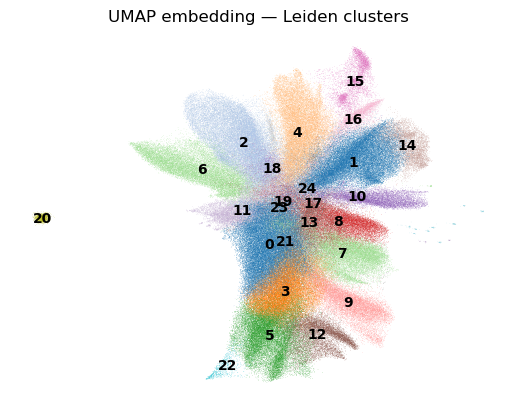

In [17]:
# 2. LEIDEN + UMAP
sc.pp.neighbors(adata_xenium_p, n_neighbors=15, n_pcs=40) # includes elbow plot calculation
sc.tl.leiden(adata_xenium_p, resolution=1.0, key_added="leiden")
sc.tl.umap(adata_xenium_p)

sc.pl.umap(
    adata_xenium_p,
    color="leiden",
    palette="tab20",
    title="UMAP embedding — Leiden clusters",
    legend_loc="on data",
    frameon=False
)

## THE BIOMARKER ENRICHMENT ANALYSIS OBTAINED IN PREVIOUS SECTION IS MASKED ON UMAP

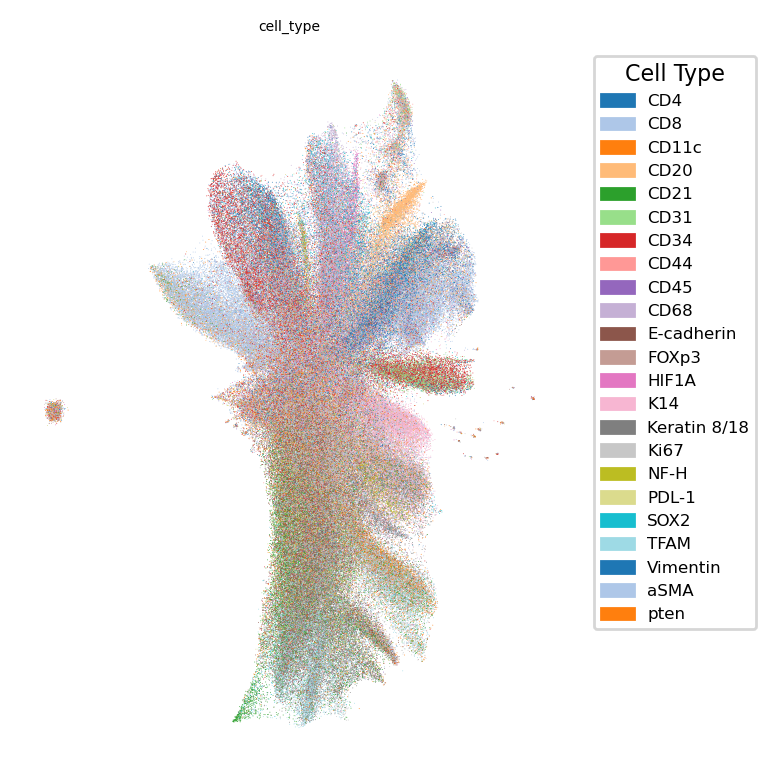

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# after you’ve built cat_order:
cat_order = adata_xenium_p.obs['cell_type'].cat.categories.tolist()

# build a discrete list of colors (hex strings) matching that order
palette = sns.color_palette("tab20", n_colors=len(cat_order)).as_hex()
# 1) Ensure cell_type is categorical and grab its order
adata_xenium_p.obs['cell_type'] = adata_xenium_p.obs['cell_type'].astype('category')
cat_order = adata_xenium_p.obs['cell_type'].cat.categories.tolist()

# 2) Build a matching list of colors (same as you used for palette)
#    Here, we assume you already built “palette” as a list in cat_order
colors = palette  # list of colors in the same order as cat_order

# 3) Plot UMAP into a new Figure/Axes
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
sc.pl.umap(
    adata_xenium_p,
    color='cell_type',
    palette=colors,
    ax=ax,
    show=False,
    frameon=False
)

# 4) Remove the default “on data” legend if present
if ax.get_legend() is not None:
    ax.get_legend().remove()

# 5) Create a manual legend
handles = [
    mpatches.Patch(color=colors[i], label=cat_order[i])
    for i in range(len(cat_order))
]
leg = ax.legend(
    handles=handles,
    title='Cell Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=6,
    title_fontsize=8
)

# 6) (Optional) shrink text on axes and title
ax.tick_params(labelsize=3)
ax.title.set_fontsize(5)

plt.tight_layout()
plt.show()

In [19]:
#### SPLITS THE CELLS IN AND OUT CLUSTER COM
# 5. Rank “Xenium spot counts” per Leiden group
sc.tl.rank_genes_groups(
    adata_xenium_p,
    groupby="leiden",
    method="wilcoxon",
    key_added="rank_leiden"
)

/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value enco

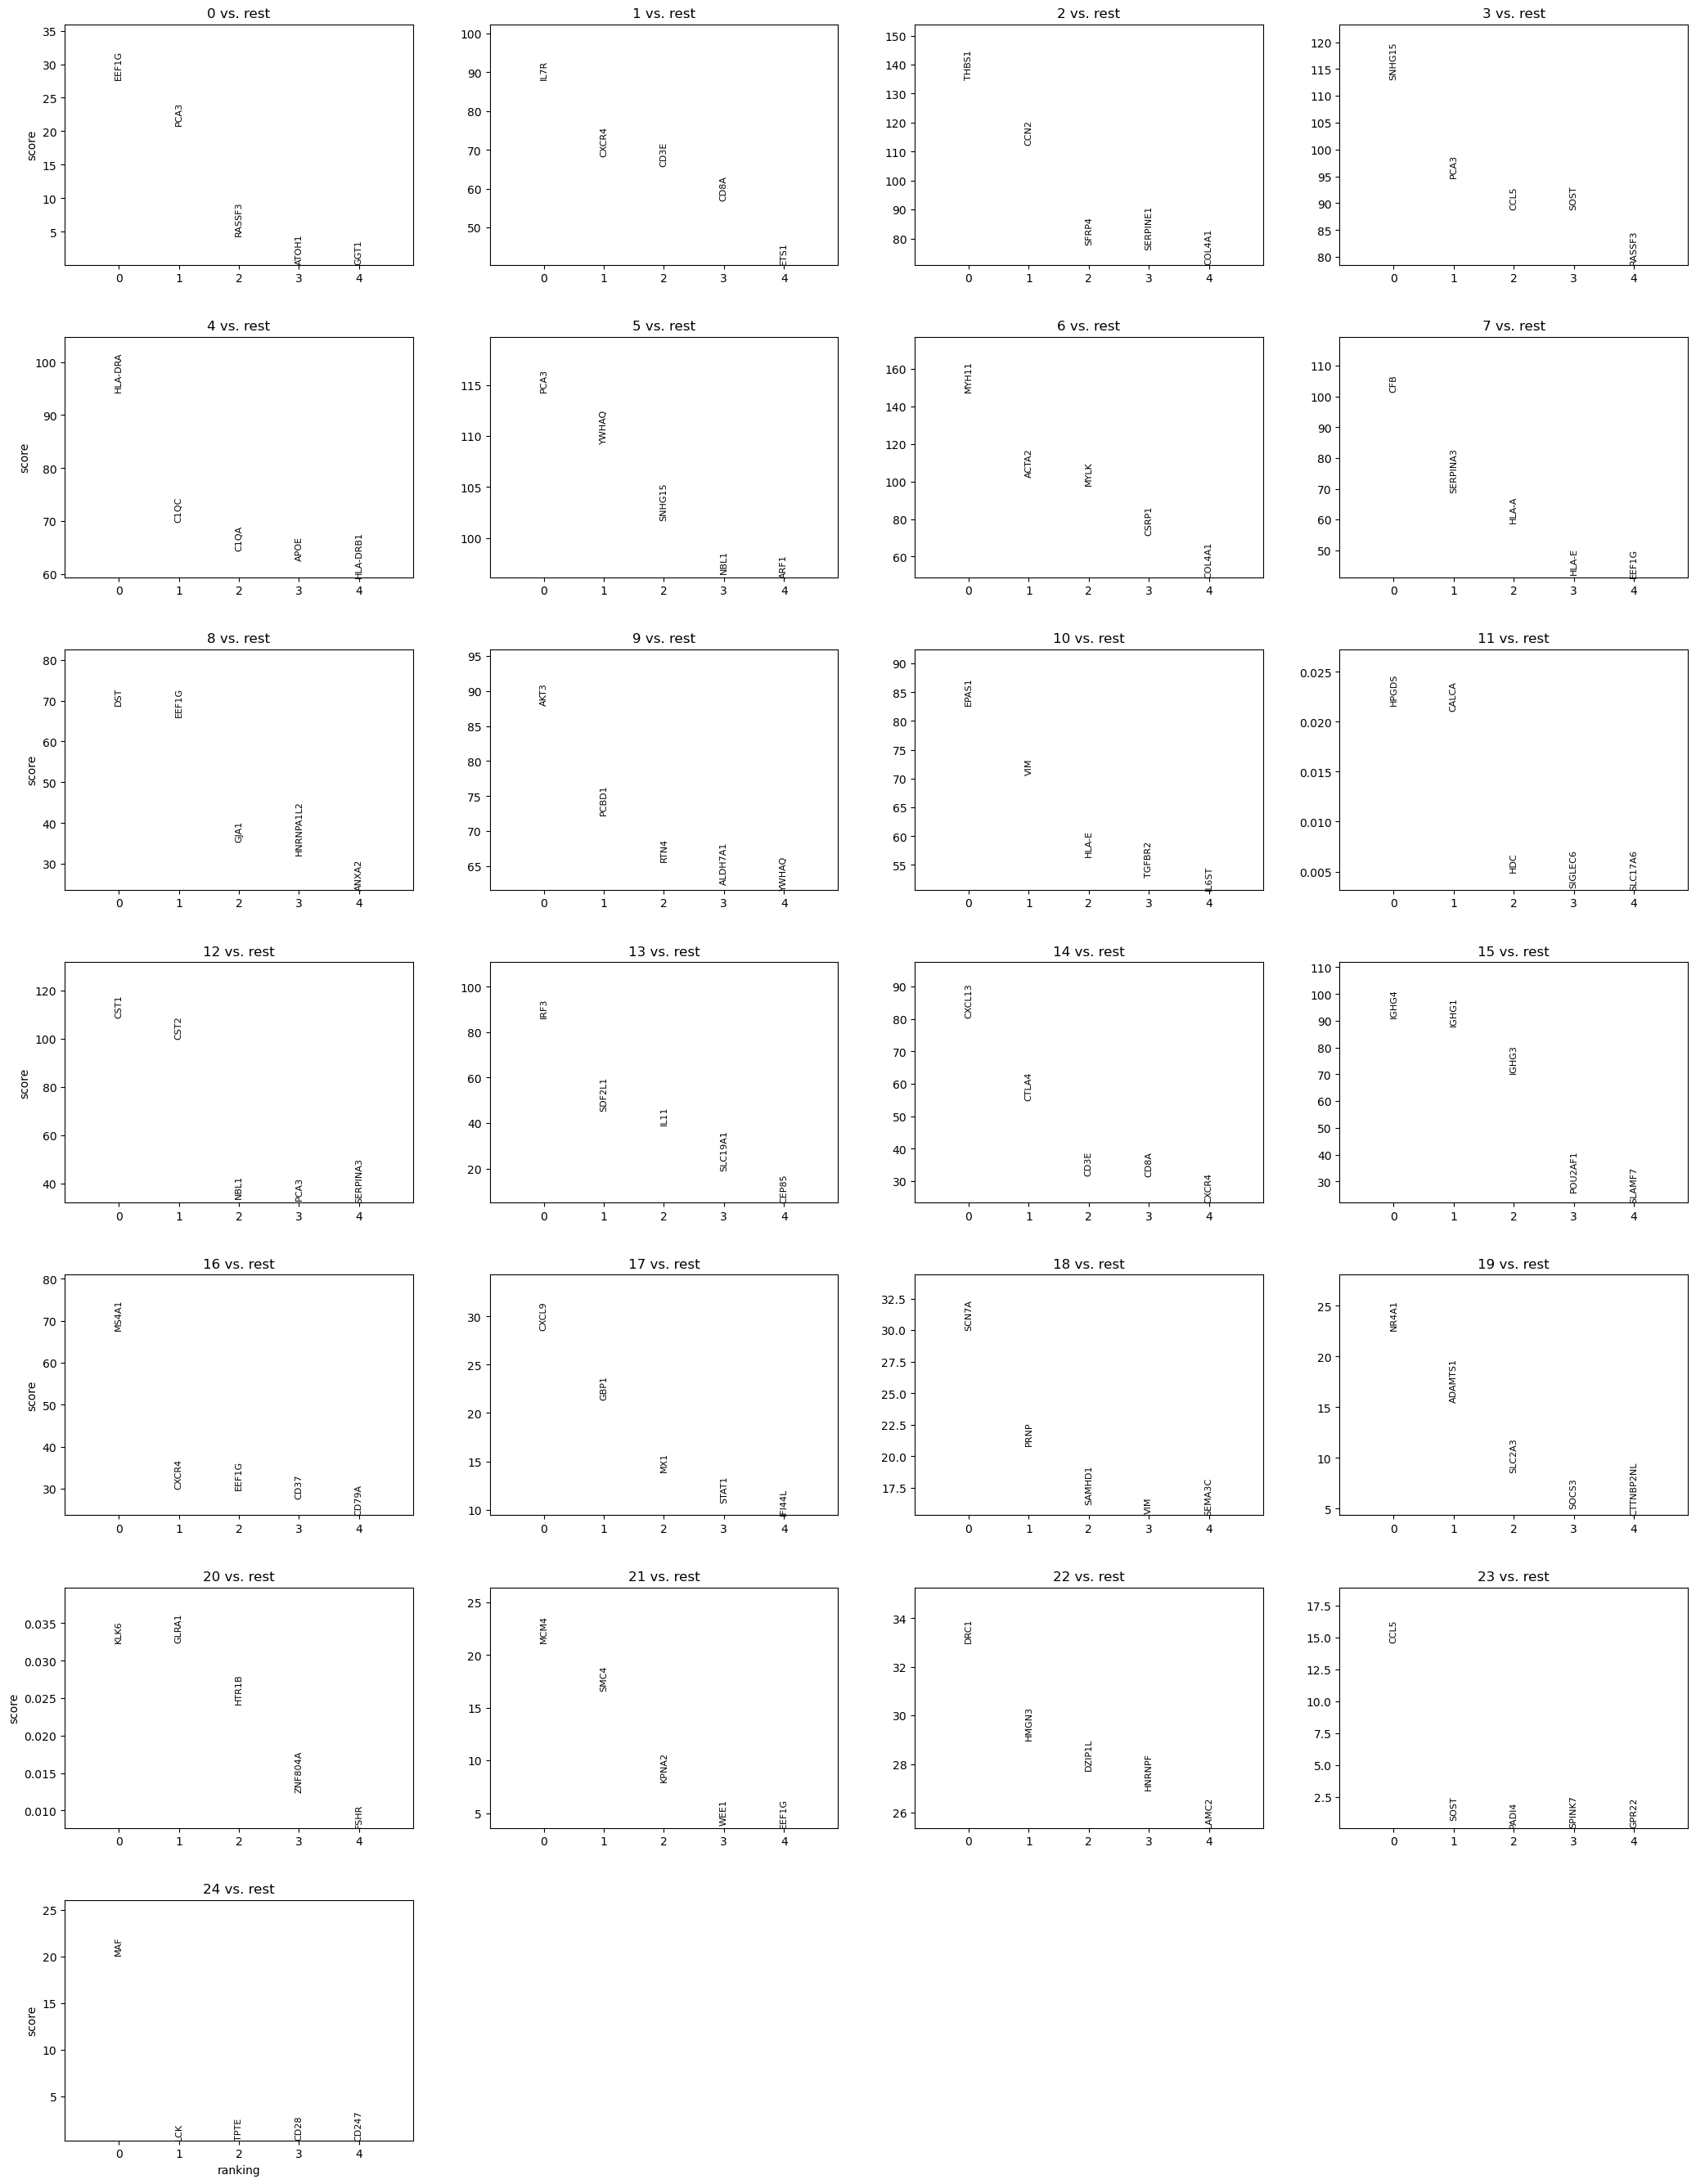

In [20]:
sc.pl.rank_genes_groups(
    adata_xenium_p,
    key="rank_leiden",
    n_genes=5,
    sharey=False
)

In [ ]:
import scanpy as sc
import pandas as pd
from collections import OrderedDict

# 1) Flatten all DE results into a DataFrame
df = sc.get.rank_genes_groups_df(
    adata_xenium_p,
    group=None,           # None = include every Leiden cluster
    key="rank_leiden"     # the key you used when running rank_genes_groups
)                     

# 2) For each cluster, take the first 7 genes
top7 = (
    df
      .groupby("group")["names"]
      .apply(lambda genes: genes.iloc[:7].tolist())
)

# 3) Convert to a  table
df_top7 = pd.DataFrame({
    f"cluster_{grp}": genes 
    for grp, genes in top7.items()
})

df_top7 = df_top7[sorted(df_top7.columns, key=lambda x: int(x.split("_")[1]))]

df_top7

/var/folders/4p/7h_929nx5qngrf9z7xhfy15w0000gn/T/ipykernel_1557/3717442447.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")["names"]


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24
0,EEF1G,IL7R,THBS1,SNHG15,HLA-DRA,PCA3,MYH11,CFB,DST,AKT3,...,IGHG4,MS4A1,CXCL9,SCN7A,NR4A1,KLK6,MCM4,DRC1,CCL5,MAF
1,PCA3,CXCR4,CCN2,PCA3,C1QC,YWHAQ,ACTA2,SERPINA3,EEF1G,PCBD1,...,IGHG1,CXCR4,GBP1,PRNP,ADAMTS1,GLRA1,SMC4,HMGN3,SOST,LCK
2,RASSF3,CD3E,SFRP4,CCL5,C1QA,SNHG15,MYLK,HLA-A,GJA1,RTN4,...,IGHG3,EEF1G,MX1,SAMHD1,SLC2A3,HTR1B,KPNA2,DZIP1L,PADI4,TPTE
3,ATOH1,CD8A,SERPINE1,SOST,APOE,NBL1,CSRP1,HLA-E,HNRNPA1L2,ALDH7A1,...,POU2AF1,CD37,STAT1,VIM,SOCS3,ZNF804A,WEE1,HNRNPF,SPINK7,CD28
4,GGT1,ETS1,COL4A1,RASSF3,HLA-DRB1,ARF1,COL4A1,EEF1G,ANXA2,YWHAQ,...,SLAMF7,CD79A,IFI44L,SEMA3C,CTTNBP2NL,FSHR,EEF1G,LAMC2,GPR22,CD247
5,SLC30A8,GZMK,TIMP2,IRF3,CTSL,ATF4,HSPB8,SLC40A1,FBL,HNRNPA1L2,...,MZB1,CCL5,IRF1,ANXA1,NEDD9,PRG4,TUBB,NEK11,CHRNB4,INKA2
6,CYP2C8,HLA-E,FSTL1,SDF2L1,MAFB,ANXA5,ITGA5,NEFH,IL6ST,ACACA,...,DERL3,SCIMP,OAS3,CLIC4,TIPARP,CNDP1,CKAP5,IL5RA,CNDP1,IL18BP


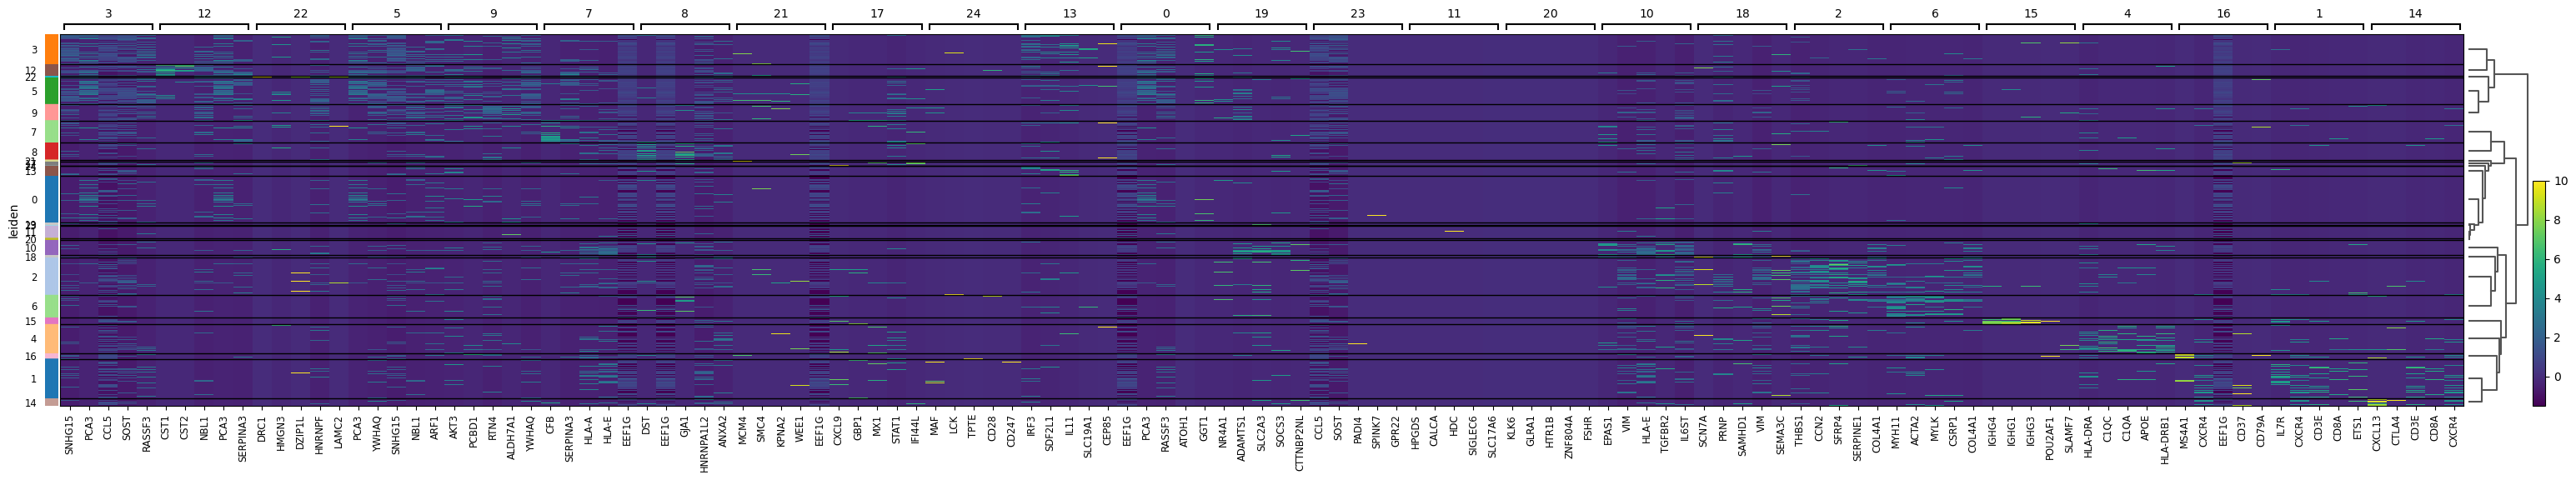

In [22]:
# 6. Visualize top markers
sc.pl.rank_genes_groups_heatmap(
    adata_xenium_p,
    key="rank_leiden",
    groupby="leiden",
    n_genes=5,
    swap_axes=False,
    show_gene_labels=True,
    dendrogram=True
)

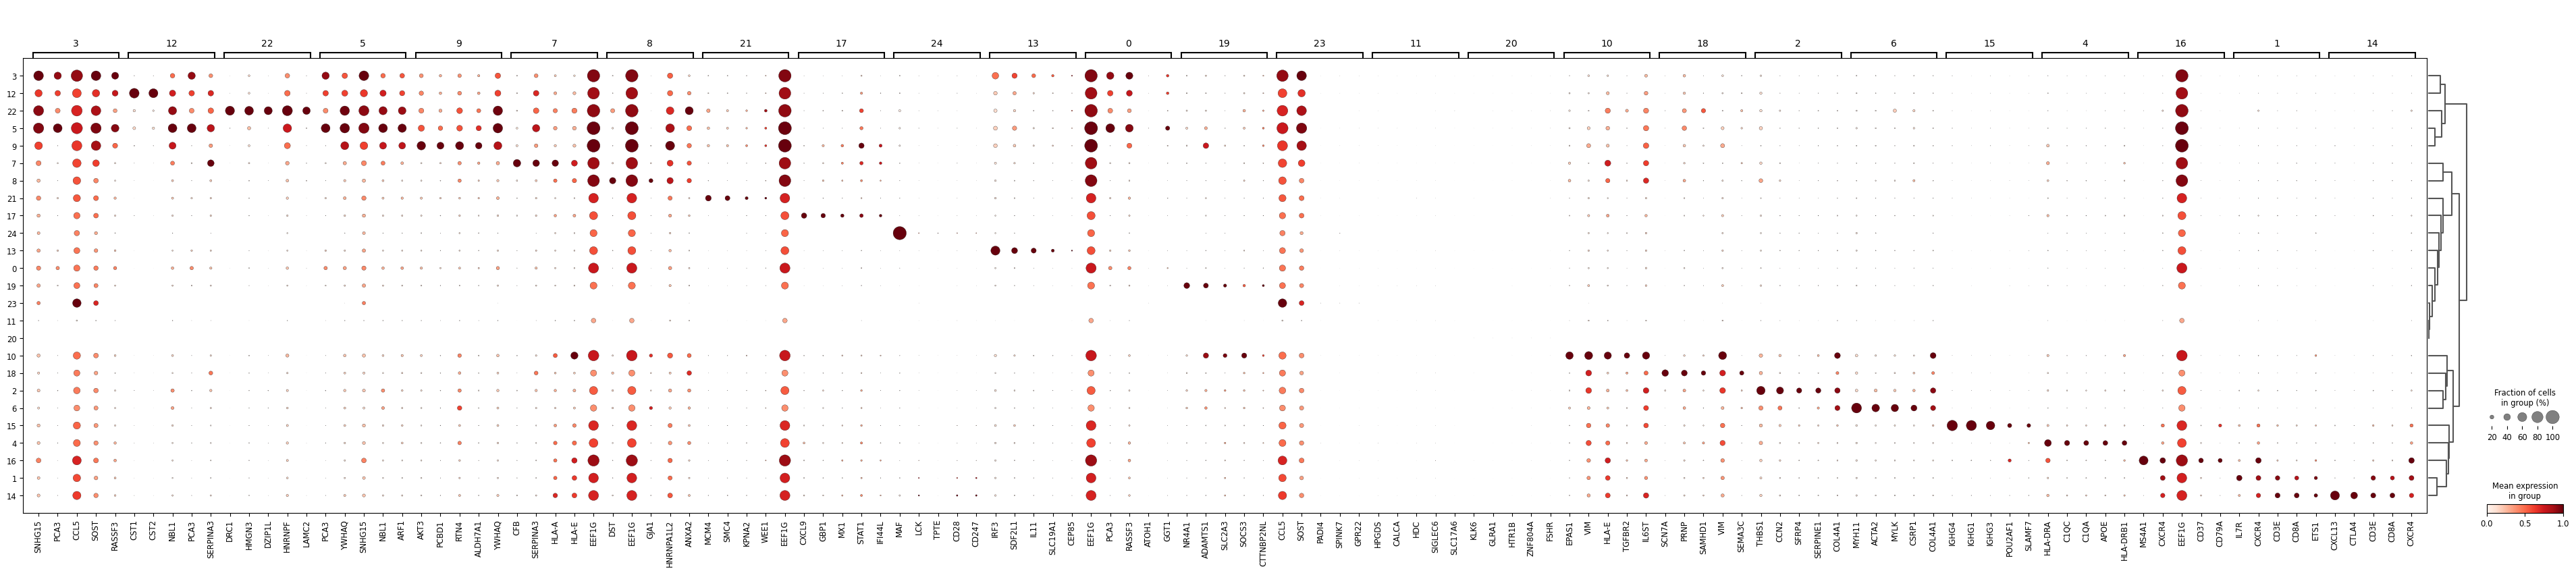

In [23]:
sc.pl.rank_genes_groups_dotplot(
    adata_xenium_p,
    key="rank_leiden",
    groupby="leiden",
    n_genes=5,
    standard_scale="var"
)

In [ ]:
# !pip install plotly
# import pandas as pd
# import plotly.express as px

# # 1) Assemble your DataFrame
# df = pd.DataFrame({
#     "x": adata.obsm["spatial"][:, 0],
#     "y": adata.obsm["spatial"][:, 1],
#     "cell_type": adata.obs["cell_type_manuel"].astype(str).values,
# })

# # 2) Create the Plotly scatter with large dimensions
# fig = px.scatter(
#     df,
#     x="x",
#     y="y",
#     color="cell_type",
#     category_orders={"cell_type": list(annotation_dict.values())},
#     color_discrete_sequence=px.colors.qualitative.T10,
#     width=3000,   # 22 inches × 100 dpi
#     height=1200,  # 44 inches × 100 dpi
# )

# # 3) Tweak marker size, opacity, hide axes
# fig.update_traces(marker=dict(size=4, opacity=0.6), selector=dict(mode="markers"))
# fig.update_layout(
#     legend_title_text="Cell Type",
#     title="Spatial scatter — cell_type_manuel",
#     xaxis=dict(showgrid=False, zeroline=False, visible=False),
#     yaxis=dict(showgrid=False, zeroline=False, visible=False),
#     margin=dict(l=10, r=10, t=30, b=10),
# )
# fig.update_traces(marker=dict(size=5))

# fig.write_html("leiden_onTissue_Region1.html")

In [24]:
adata_xenium_p.write_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region2/REGION2_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.Xenium_Process_Table.V2.h5ad")

## Extra (UMAP by PhenoCycler)

In [25]:
sc.pp.normalize_total(adata_pheno)
sc.pp.log1p(adata_pheno)
sc.pp.pca(adata_pheno)
sc.pp.neighbors(adata_pheno)
sc.tl.umap(adata_pheno)
sc.tl.leiden(adata_pheno, resolution=0.1)

/Users/ugursahin/miniforge3/envs/ScanPy2/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


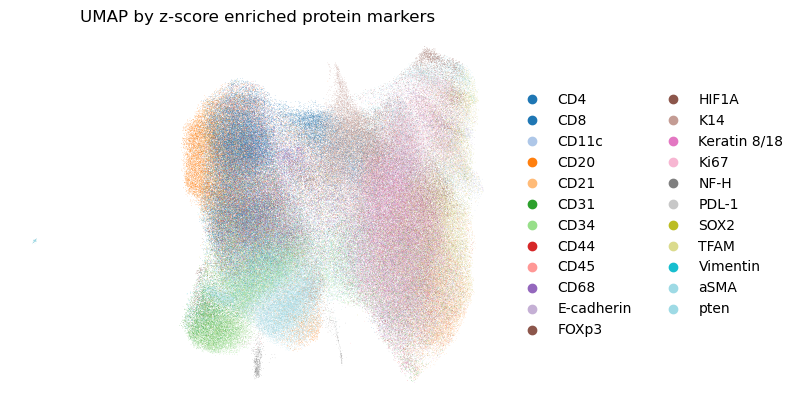

In [26]:
sc.pl.umap(
    adata_pheno,
    color='cell_type',
    palette="tab20",
    title='UMAP by z-score enriched protein markers',
    legend_loc='right margin',
    frameon=False
)

## Save

In [ ]:
#sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Ann"] = adata
#adata.write("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_Region1_DownstreamAnalysis.image_props.phenocycler.annotated_UMAP.zarr")
#sdata.write("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V7.zarr")

In [27]:
adata_pheno.write_h5ad(f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/Region2/REGION2_TABLES/{Tissue}_Xenium_Phen_HE_Integrated.Protein_PhenCycTable.V2.h5ad")